In [77]:
import pandas as pd

# Load the dataset
file_path = R"C:\Users\Ashok Kasaram\Downloads\MUSIC THERAPY DATASET.csv"
df = pd.read_csv(file_path)

# Display basic information about the dataset
df

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,10/30/2022 14:37,17.0,Spotify,2.0,Yes,Yes,No,Rock,Yes,Yes,...,Never,Rarely,Very frequently,Never,7.0,6.0,0.0,9.0,Improve,I understand.
732,11-01-2022 22:26,18.0,Spotify,1.0,Yes,Yes,No,Pop,Yes,Yes,...,Never,Never,Sometimes,Sometimes,3.0,2.0,2.0,5.0,Improve,I understand.
733,11-03-2022 23:24,19.0,Other streaming service,6.0,Yes,No,Yes,Rap,Yes,No,...,Sometimes,Sometimes,Rarely,Rarely,2.0,2.0,2.0,2.0,Improve,I understand.
734,11-04-2022 17:31,19.0,Spotify,5.0,Yes,Yes,No,Classical,No,No,...,Never,Never,Never,Sometimes,2.0,3.0,2.0,1.0,Improve,I understand.


In [52]:
import pandas as pd

# Creating a neatly formatted DataFrame to display the main content of each column
formatted_summary = pd.DataFrame({
    'Column Name': df.columns,
    'Categorical/Continuous': [ 
        'Categorical' if df[col].dtype == 'object' or len(df[col].unique()) < 10 else 'Continuous' 
        for col in df.columns],  # Categorize based on the type of column
    'Sample Values': [', '.join(map(str, df[col].unique()[:5])) for col in df.columns]  # Join up to 5 unique values to shorten
})

# Truncate the sample values for readability if they are too long
formatted_summary['Sample Values'] = formatted_summary['Sample Values'].apply(lambda x: x[:50] + '...' if len(x) > 50 else x)

# Styling the DataFrame for better presentation
styled_summary = formatted_summary.style.set_table_styles([
    # Style for header
    {'selector': 'thead th', 'props': [('background-color', '#4CAF50'), ('color', 'white'), ('text-align', 'center'), ('font-weight', 'bold')]},
    # Style for even rows
    {'selector': 'tr:nth-child(even)', 'props': [('background-color', '#f2f2f2')]},
    # Style for odd rows
    {'selector': 'tr:nth-child(odd)', 'props': [('background-color', '#ffffff')]},
    # Style for the table border
    {'selector': 'table', 'props': [('border', '1px solid #ddd'), ('border-collapse', 'collapse'), ('width', '100%')]},
    # Style for data cells
    {'selector': 'td', 'props': [('border', '1px solid #ddd'), ('padding', '6px'), ('text-align', 'left')]},
    # Style for the column headers
    {'selector': 'th', 'props': [('padding', '6px')]},
])

# Adjust column widths and font size for compactness
styled_summary.set_table_attributes('class="table table-striped"').hide(axis="index").set_properties(subset=["Column Name", "Sample Values"], **{
    'font-size': '11px',  # Smaller font size
    'white-space': 'normal',  # Allows wrapping text in cells
    'word-wrap': 'break-word'  # Break words to wrap in the cells
}).set_properties(subset=["Categorical/Continuous"], **{
    'font-size': '10px'  # Keep the Categorical/Continuous column small too
})

# Displaying the beautifully styled summary (it will fit in one slide of a PowerPoint)
styled_summary


Column Name,Categorical/Continuous,Sample Values
Timestamp,Categorical,"8/27/2022 19:29, 8/27/2022 19:57, 8/27/2022 21:28,..."
Age,Continuous,"18.0, 63.0, 61.0, 21.0, 19.0"
Primary streaming service,Categorical,"Spotify, Pandora, YouTube Music, I do not use a st..."
Hours per day,Continuous,"3.0, 1.5, 4.0, 2.5, 5.0"
While working,Categorical,"Yes, No, nan"
Instrumentalist,Categorical,"Yes, No, nan"
Composer,Categorical,"Yes, No, nan"
Fav genre,Categorical,"Latin, Rock, Video game music, Jazz, R&B"
Exploratory,Categorical,"Yes, No"
Foreign languages,Categorical,"Yes, No, nan"


### Exploratory Data Analysis

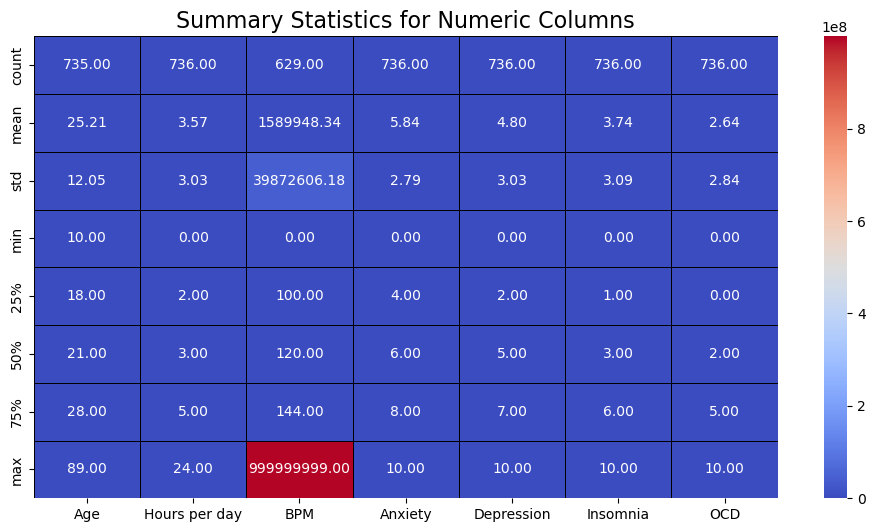

Timestamp                       679
Primary streaming service         6
While working                     2
Instrumentalist                   2
Composer                          2
Fav genre                        16
Exploratory                       2
Foreign languages                 2
Frequency [Classical]             4
Frequency [Country]               4
Frequency [EDM]                   4
Frequency [Folk]                  4
Frequency [Gospel]                4
Frequency [Hip hop]               4
Frequency [Jazz]                  4
Frequency [K pop]                 4
Frequency [Latin]                 4
Frequency [Lofi]                  4
Frequency [Metal]                 4
Frequency [Pop]                   4
Frequency [R&B]                   4
Frequency [Rap]                   4
Frequency [Rock]                  4
Frequency [Video game music]      4
Music effects                     3
Permissions                       1
dtype: int64

In [53]:
import seaborn as sns

# Summary statistics for numeric columns
numeric_summary = df.describe()

# Creating a styled heatmap for the numeric summary
plt.figure(figsize=(12, 6))
sns.heatmap(
    numeric_summary,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5,
    cbar=True,
    linecolor="black"
)
plt.title("Summary Statistics for Numeric Columns", fontsize=16)
plt.show()

# Count of unique values in categorical columns
categorical_columns = df.select_dtypes(include="object").columns
categorical_summary = df[categorical_columns].nunique()

# Displaying the categorical summary
categorical_summary

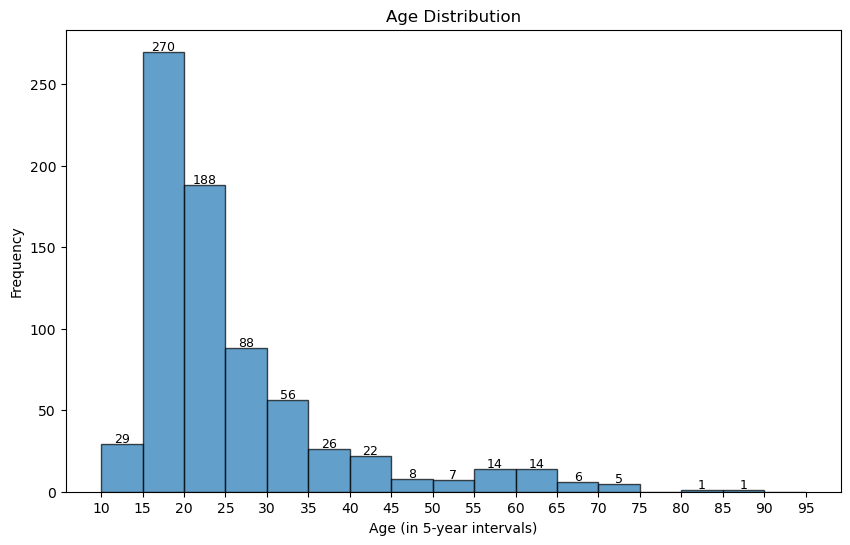

In [54]:
# Correcting the column name reference as the dataset uses lowercase and underscores
plt.figure(figsize=(10, 6))
ax = df['Age'].plot(kind='hist', bins=range(10, 100, 5), alpha=0.7, edgecolor='black')
plt.title("Age Distribution")
plt.xlabel("Age (in 5-year intervals)")
plt.ylabel("Frequency")

# Add counts to the bins
for patch in ax.patches:
    height = patch.get_height()
    if height > 0:
        plt.text(patch.get_x() + patch.get_width() / 2, height + 1, int(height),
                 ha='center', fontsize=9)

plt.xticks(range(10, 100, 5))  # Set linear intervals on x-axis
plt.show()


Index(['Timestamp', 'Age', 'Primary streaming service', 'Hours per day',
       'While working', 'Instrumentalist', 'Composer', 'Fav genre',
       'Exploratory', 'Foreign languages', 'BPM', 'Frequency [Classical]',
       'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]',
       'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]',
       'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]',
       'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]',
       'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]',
       'Anxiety', 'Depression', 'Insomnia', 'OCD', 'Music effects',
       'Permissions'],
      dtype='object')


C:\Users\Ashok Kasaram\AppData\Local\Temp\ipykernel_12432\2701315518.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, y='Primary streaming service', order=df['Primary streaming service'].value_counts().index, palette="viridis")


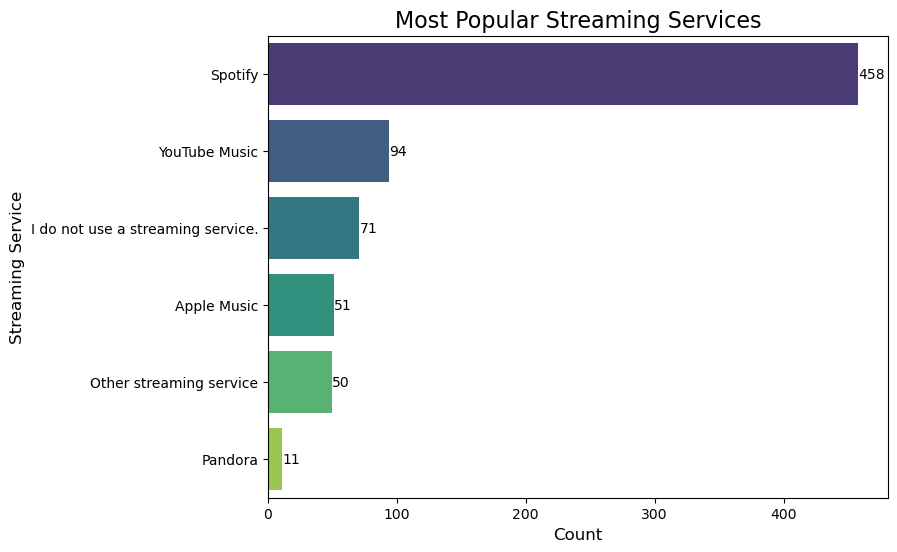

In [55]:
# Checking the column names
print(df.columns)

# 3. Primary Streaming Service with counts in bars
plt.figure(figsize=(8, 6))

# Ensure the correct column name is used here
ax = sns.countplot(data=df, y='Primary streaming service', order=df['Primary streaming service'].value_counts().index, palette="viridis")

# Annotating bars with counts
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10)

# Plotting the title and labels
plt.title('Most Popular Streaming Services', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Streaming Service', fontsize=12)
plt.show()


C:\Users\Ashok Kasaram\AppData\Local\Temp\ipykernel_12432\1273799564.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, y='Fav genre', order=df['Fav genre'].value_counts().index, palette="muted")


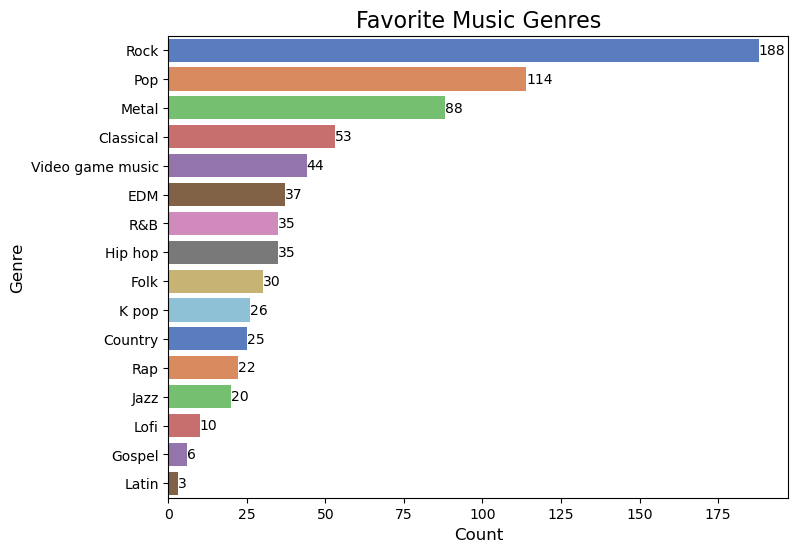

In [56]:
# 4. Favorite Genre with counts in bars
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, y='Fav genre', order=df['Fav genre'].value_counts().index, palette="muted")
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10)
plt.title('Favorite Music Genres', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.show()

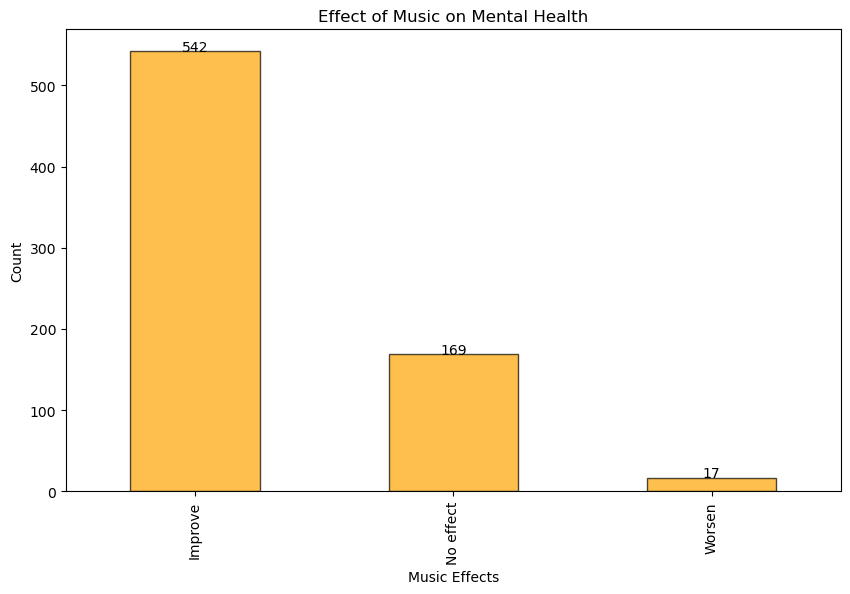

In [57]:
# 5. Music Effects on Mental Health with counts
plt.figure(figsize=(10, 6))
ax = df['Music effects'].value_counts().plot(kind='bar', alpha=0.7, edgecolor='black', color='orange')
plt.title('Effect of Music on Mental Health')
plt.xlabel('Music Effects')
plt.ylabel('Count')

# Add counts to bars
for patch in ax.patches:
    height = patch.get_height()
    plt.text(patch.get_x() + patch.get_width() / 2, height + 0.5, int(height),
             ha='center', fontsize=10)

plt.show()

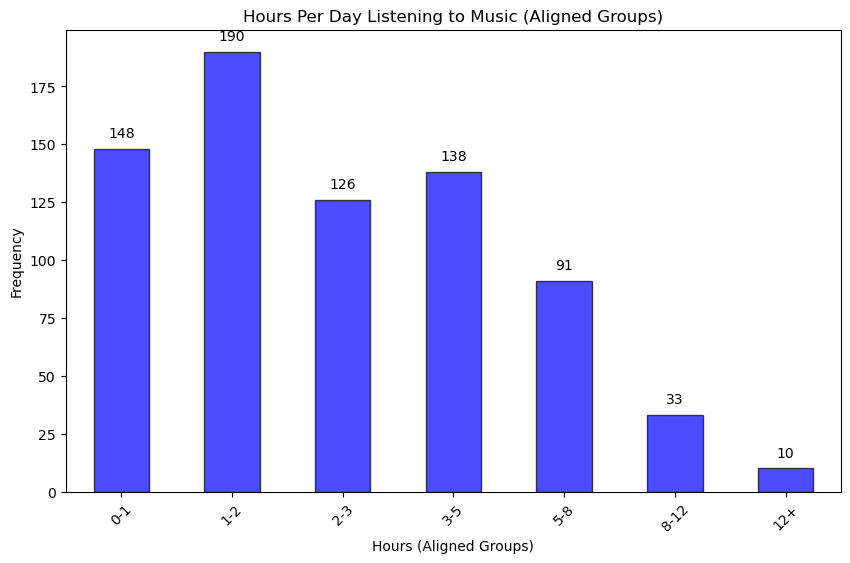

In [58]:
# 6 Hours Per Day Listening to Music
# Adjust bins and labels to ensure intervals don't overlap and align with expectations
bins = [0, 1, 2, 3, 5, 8, 12, 24]  # Define bins
labels = ['0-1', '1-2', '2-3', '3-5', '5-8', '8-12', '12+']  # Define labels

# Create the grouped data with better alignment
df['Hours Group (Aligned)'] = pd.cut(df['Hours per day'], bins=bins, labels=labels, include_lowest=True)

# Count occurrences in each group
aligned_counts = df['Hours Group (Aligned)'].value_counts(sort=False)  # Preserve order

# Plot the adjusted histogram
plt.figure(figsize=(10, 6))
aligned_counts.plot(kind='bar', color='blue', edgecolor='black', alpha=0.7)
plt.title("Hours Per Day Listening to Music (Aligned Groups)")
plt.xlabel("Hours (Aligned Groups)")
plt.ylabel("Frequency")
plt.xticks(rotation=45)

# Annotate bar counts
for idx, count in enumerate(aligned_counts):
    plt.text(idx, count + 5, str(count), ha='center', fontsize=10)

plt.show()


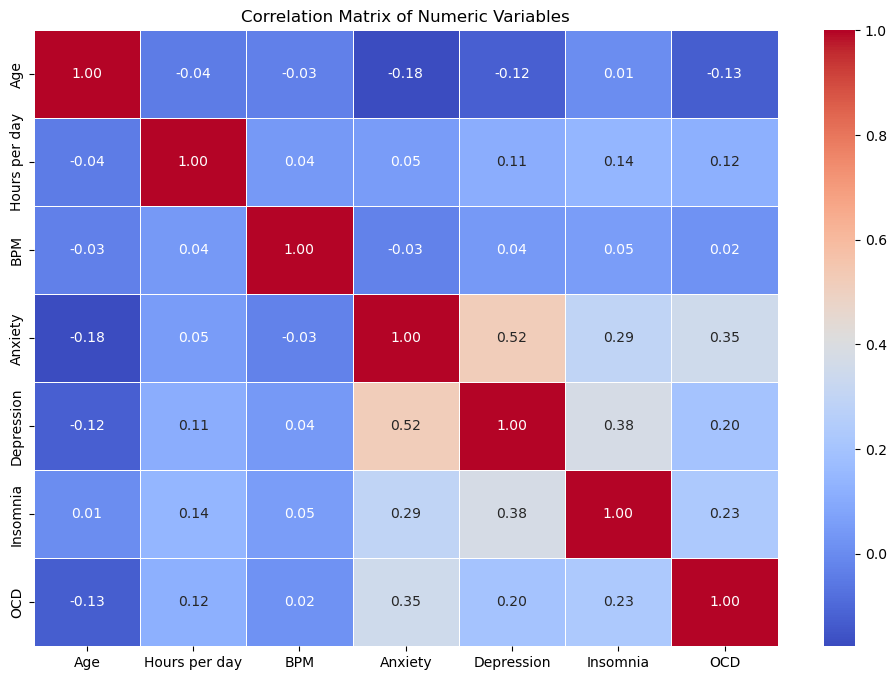

In [59]:

# Display correlation analysis results as a heatmap for numeric columns
correlation_matrix = df.select_dtypes(include=['float64']).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix of Numeric Variables")
plt.show()


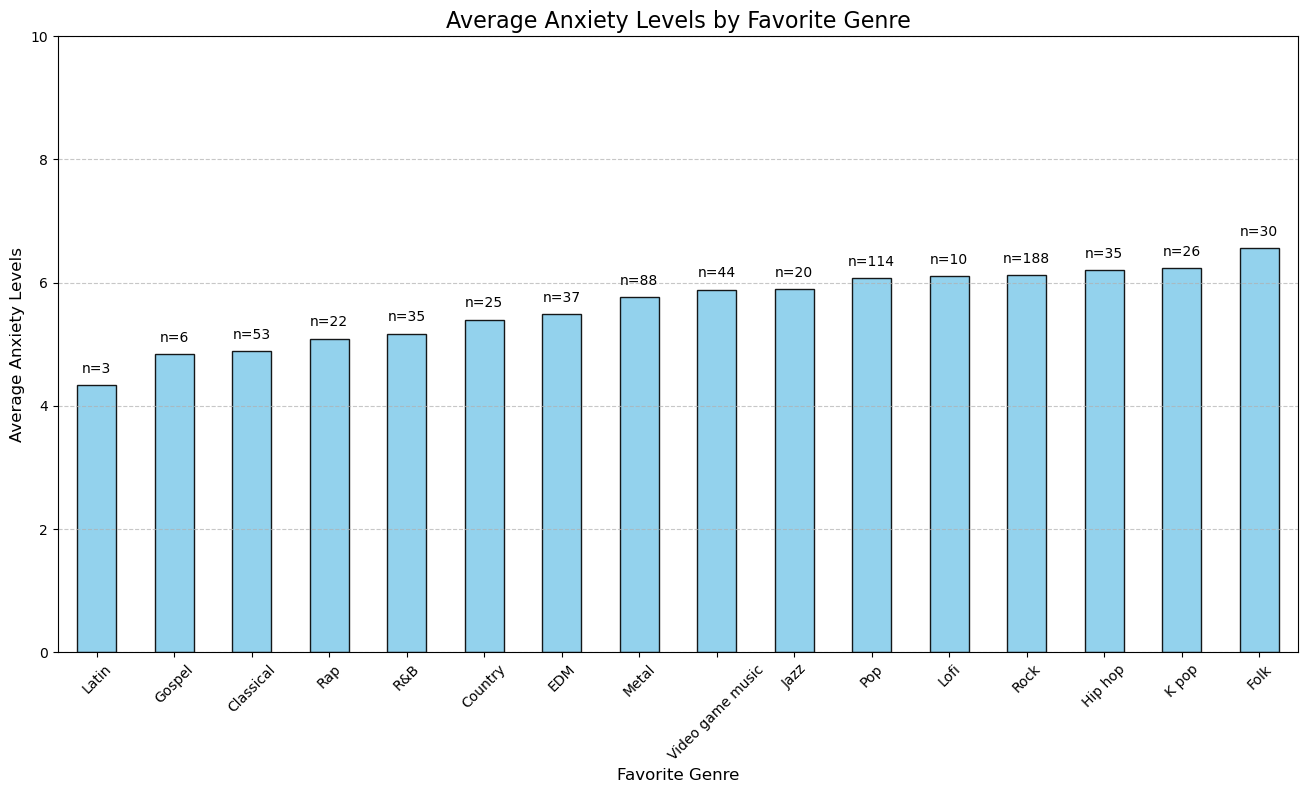

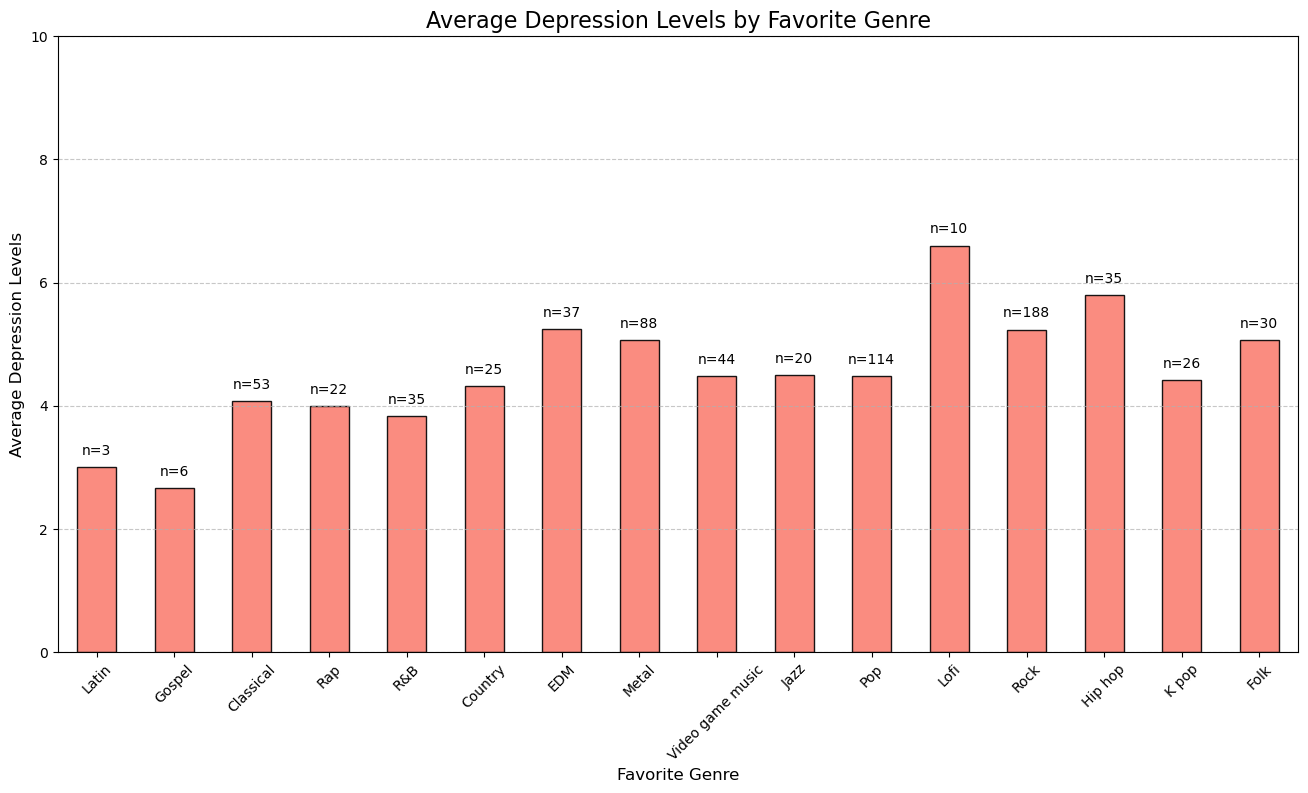

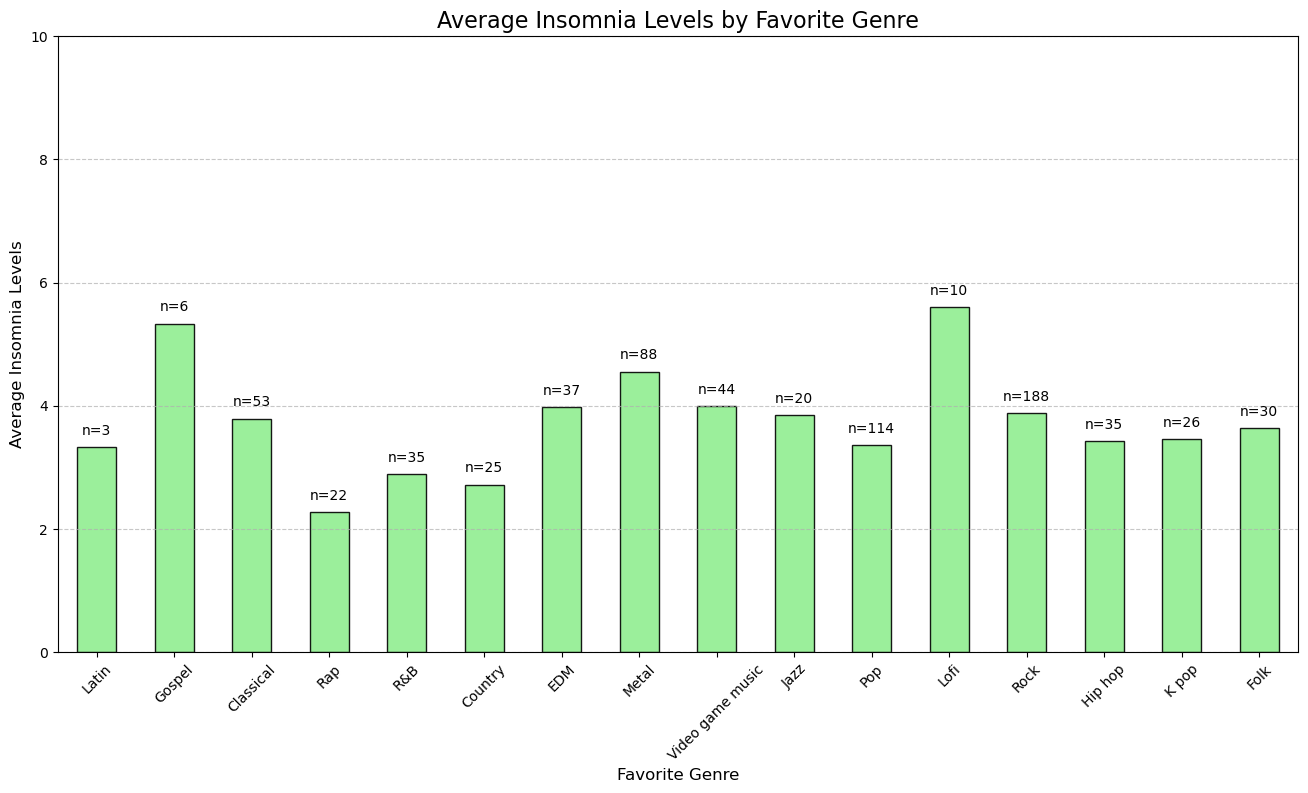

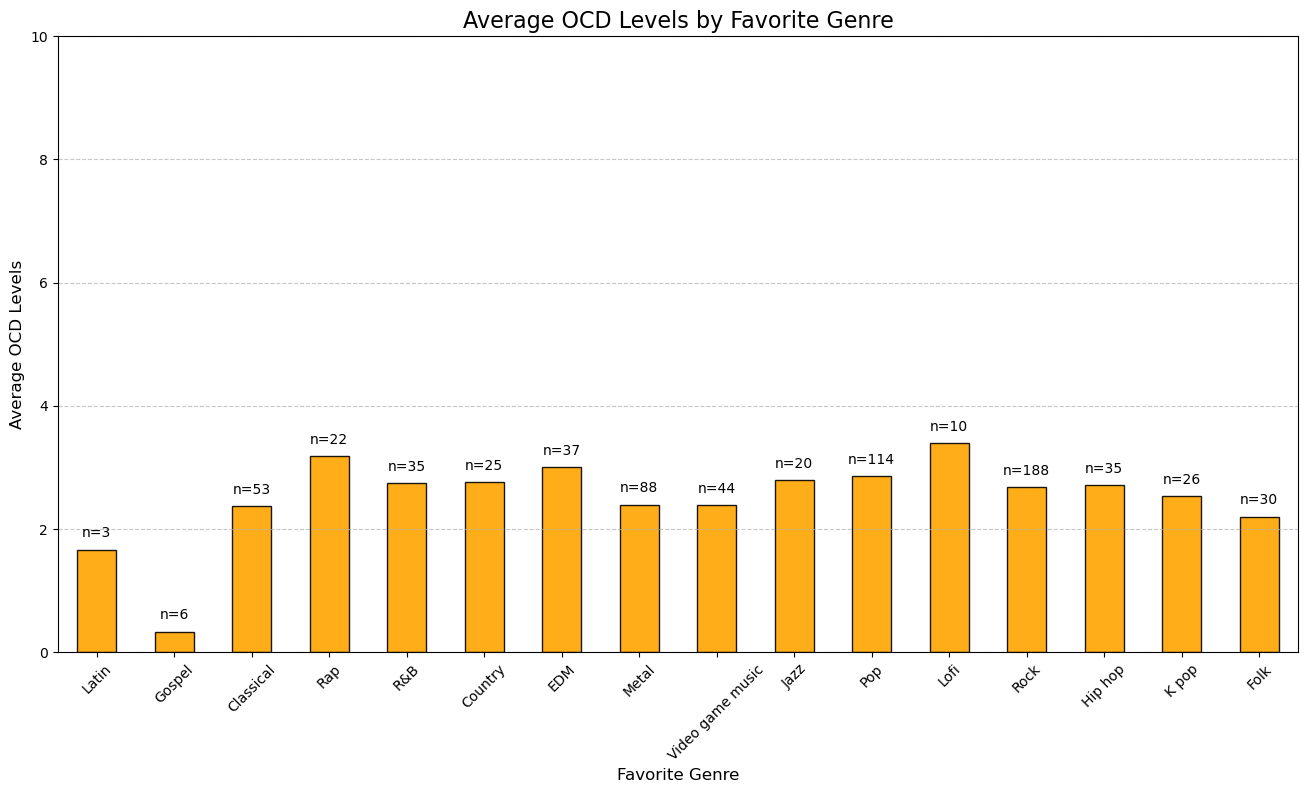

In [60]:
# Strip extra spaces from column names (if any)
df.columns = df.columns.str.strip()

# Calculate the mean mental health scores and count of respondents for each genre
genre_stats = df.groupby('Fav genre').agg(
    anxiety=('Anxiety', 'mean'),
    depression=('Depression', 'mean'),
    insomnia=('Insomnia', 'mean'),
    ocd=('OCD', 'mean'),
    count=('Anxiety', 'count')
).sort_values(by='anxiety')  # Ensure the column name matches exactly

# Define the shared scale for y-axis
shared_ylim = [0, 10]

# Plot bar charts for average mental health scores by genre, including counts
plt.figure(figsize=(16, 8))
genre_stats['anxiety'].plot(kind='bar', color='skyblue', edgecolor='k', alpha=0.9)
for i, v in enumerate(genre_stats['count']):
    plt.text(i, genre_stats['anxiety'].iloc[i] + 0.2, f'n={v}', ha='center', fontsize=10)
plt.title('Average Anxiety Levels by Favorite Genre', fontsize=16)
plt.xlabel('Favorite Genre', fontsize=12)
plt.ylabel('Average Anxiety Levels', fontsize=12)
plt.ylim(shared_ylim)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(16, 8))
genre_stats['depression'].plot(kind='bar', color='salmon', edgecolor='k', alpha=0.9)
for i, v in enumerate(genre_stats['count']):
    plt.text(i, genre_stats['depression'].iloc[i] + 0.2, f'n={v}', ha='center', fontsize=10)
plt.title('Average Depression Levels by Favorite Genre', fontsize=16)
plt.xlabel('Favorite Genre', fontsize=12)
plt.ylabel('Average Depression Levels', fontsize=12)
plt.ylim(shared_ylim)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(16, 8))
genre_stats['insomnia'].plot(kind='bar', color='lightgreen', edgecolor='k', alpha=0.9)
for i, v in enumerate(genre_stats['count']):
    plt.text(i, genre_stats['insomnia'].iloc[i] + 0.2, f'n={v}', ha='center', fontsize=10)
plt.title('Average Insomnia Levels by Favorite Genre', fontsize=16)
plt.xlabel('Favorite Genre', fontsize=12)
plt.ylabel('Average Insomnia Levels', fontsize=12)
plt.ylim(shared_ylim)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(16, 8))
genre_stats['ocd'].plot(kind='bar', color='orange', edgecolor='k', alpha=0.9)
for i, v in enumerate(genre_stats['count']):
    plt.text(i, genre_stats['ocd'].iloc[i] + 0.2, f'n={v}', ha='center', fontsize=10)
plt.title('Average OCD Levels by Favorite Genre', fontsize=16)
plt.xlabel('Favorite Genre', fontsize=12)
plt.ylabel('Average OCD Levels', fontsize=12)
plt.ylim(shared_ylim)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


C:\Users\Ashok Kasaram\AppData\Local\Temp\ipykernel_12432\746534094.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_avg = df.groupby('age_group')[['Anxiety', 'Depression', 'Insomnia', 'OCD']].mean().reset_index()


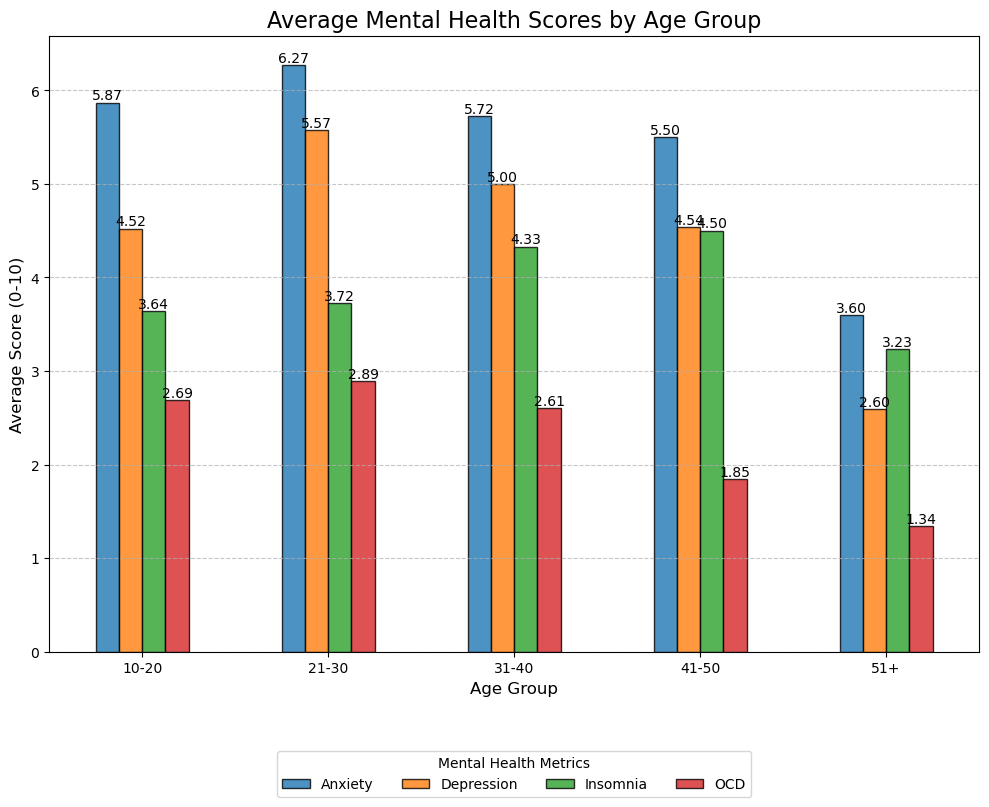

In [61]:
# Exploring demographic trends: Age and mental health metrics

# Creating bins for age groups
df['age_group'] = pd.cut(df['Age'], bins=[10, 20, 30, 40, 50, 100], labels=['10-20', '21-30', '31-40', '41-50', '51+'])

# Calculating average mental health scores for each age group
age_group_avg = df.groupby('age_group')[['Anxiety', 'Depression', 'Insomnia', 'OCD']].mean().reset_index()

# Plotting the average scores for each age group
ax = age_group_avg.set_index('age_group').plot(
    kind='bar', figsize=(12, 8), alpha=0.8, edgecolor='black'
)
plt.title('Average Mental Health Scores by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Average Score (0-10)', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Mental Health Metrics', fontsize=10, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotating the bars with the values
for p in ax.patches:
    ax.annotate(
        f'{p.get_height():.2f}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='center',
        fontsize=10, color='black',
        xytext=(0, 5),
        textcoords='offset points'
    )

plt.show()


C:\Users\Ashok Kasaram\AppData\Local\Temp\ipykernel_12432\43971609.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_avg_scores = df.groupby('Hours Bin')[['Anxiety', 'Depression', 'Insomnia', 'OCD']].mean()


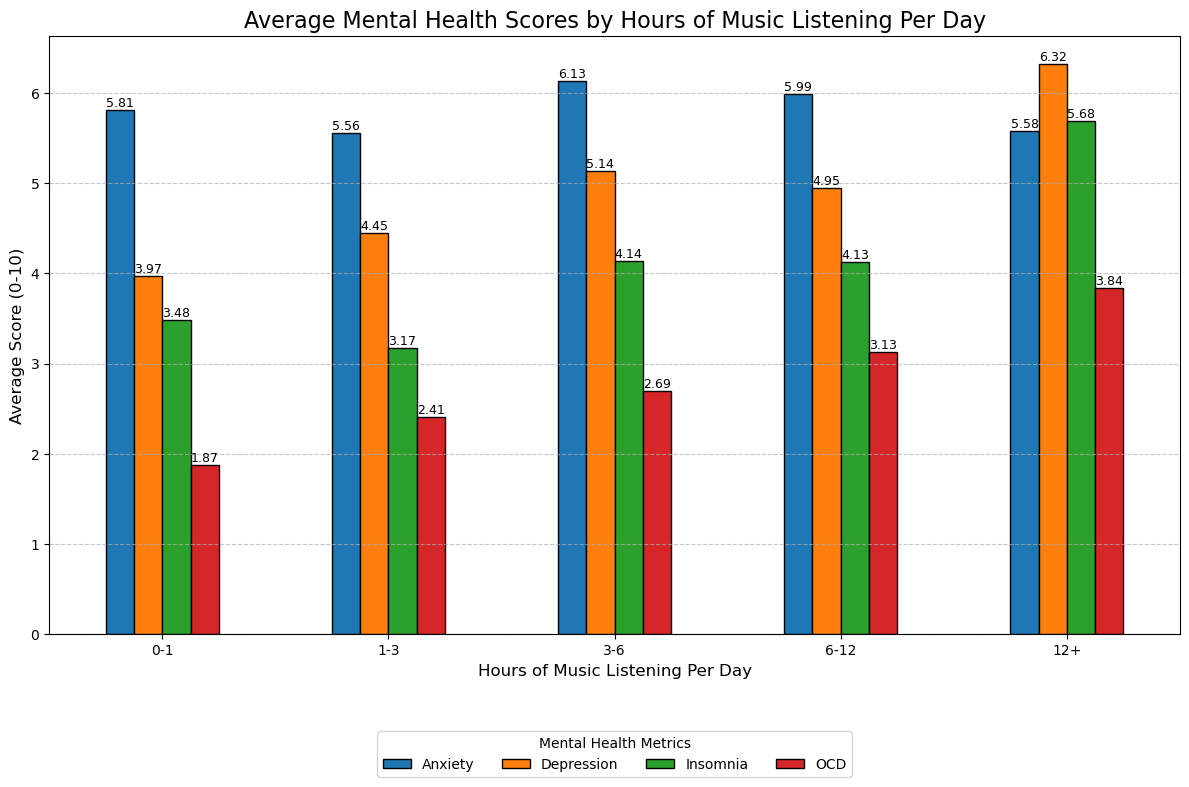

In [62]:
# Defining bins and corresponding labels
bins = [0, 1, 3, 6, 12, 100]
labels = ['0-1', '1-3', '3-6', '6-12', '12+']

# Creating a new column for the binned hours
df['Hours Bin'] = pd.cut(df['Hours per day'], bins=bins, labels=labels, right=False)

# Grouping by the binned hours and calculating the mean of mental health metrics
binned_avg_scores = df.groupby('Hours Bin')[['Anxiety', 'Depression', 'Insomnia', 'OCD']].mean()

# Plotting the grouped bar chart
ax = binned_avg_scores.plot(kind='bar', figsize=(12, 8), edgecolor='black')

plt.title('Average Mental Health Scores by Hours of Music Listening Per Day', fontsize=16)
plt.xlabel('Hours of Music Listening Per Day', fontsize=12)
plt.ylabel('Average Score (0-10)', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Mental Health Metrics', fontsize=10, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotating each bar with its value
for p in ax.patches:
    height = p.get_height()
    if not pd.isna(height):
        ax.annotate(f'{height:.2f}',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center',
                    fontsize=9, color='black',
                    xytext=(0, 5),
                    textcoords='offset points')

plt.tight_layout()
plt.show()


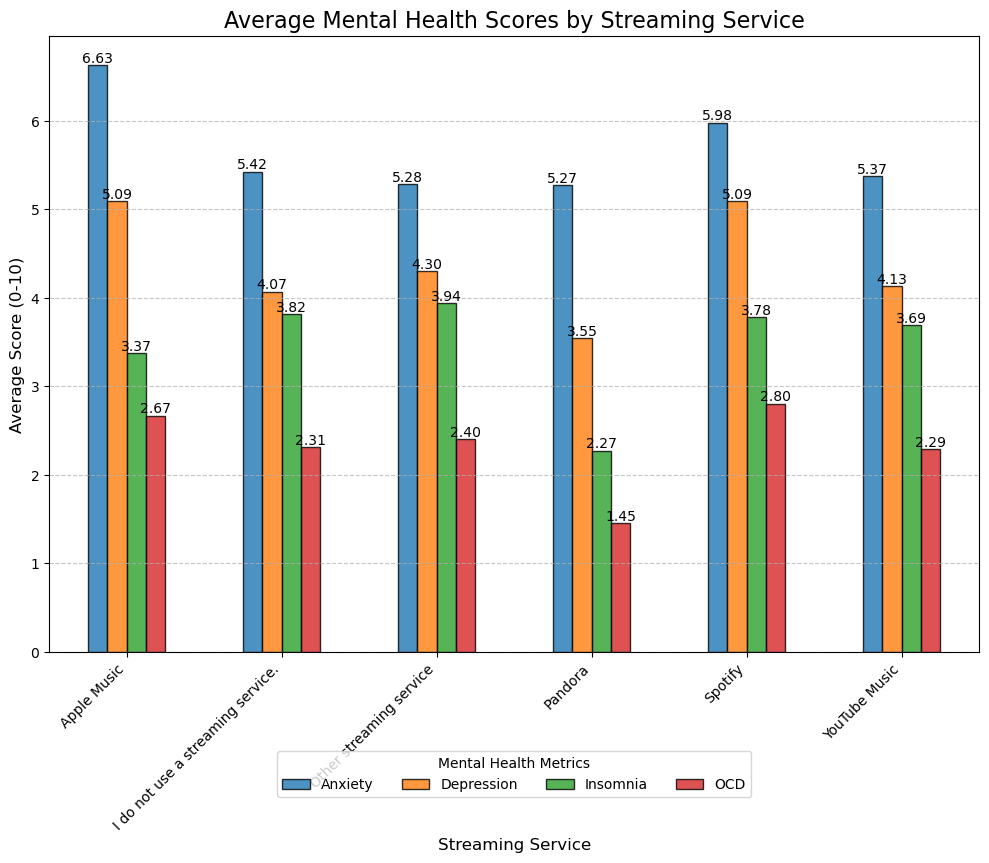

In [63]:
# Analyzing the impact of streaming services on mental health metrics

# Group data by 'primary_streaming_service' and calculate average mental health scores
streaming_services_avg = df.groupby('Primary streaming service')[['Anxiety', 'Depression', 'Insomnia', 'OCD']].mean().reset_index()

# Plotting the average scores for each streaming service
ax = streaming_services_avg.set_index('Primary streaming service').plot(
    kind='bar', figsize=(12, 8), alpha=0.8, edgecolor='black'
)
plt.title('Average Mental Health Scores by Streaming Service', fontsize=16)
plt.xlabel('Streaming Service', fontsize=12)
plt.ylabel('Average Score (0-10)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Mental Health Metrics', fontsize=10, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotating the bars with the values
for p in ax.patches:
    ax.annotate(
        f'{p.get_height():.2f}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='center',
        fontsize=10, color='black',
        xytext=(0, 5),
        textcoords='offset points'
    )

plt.show()


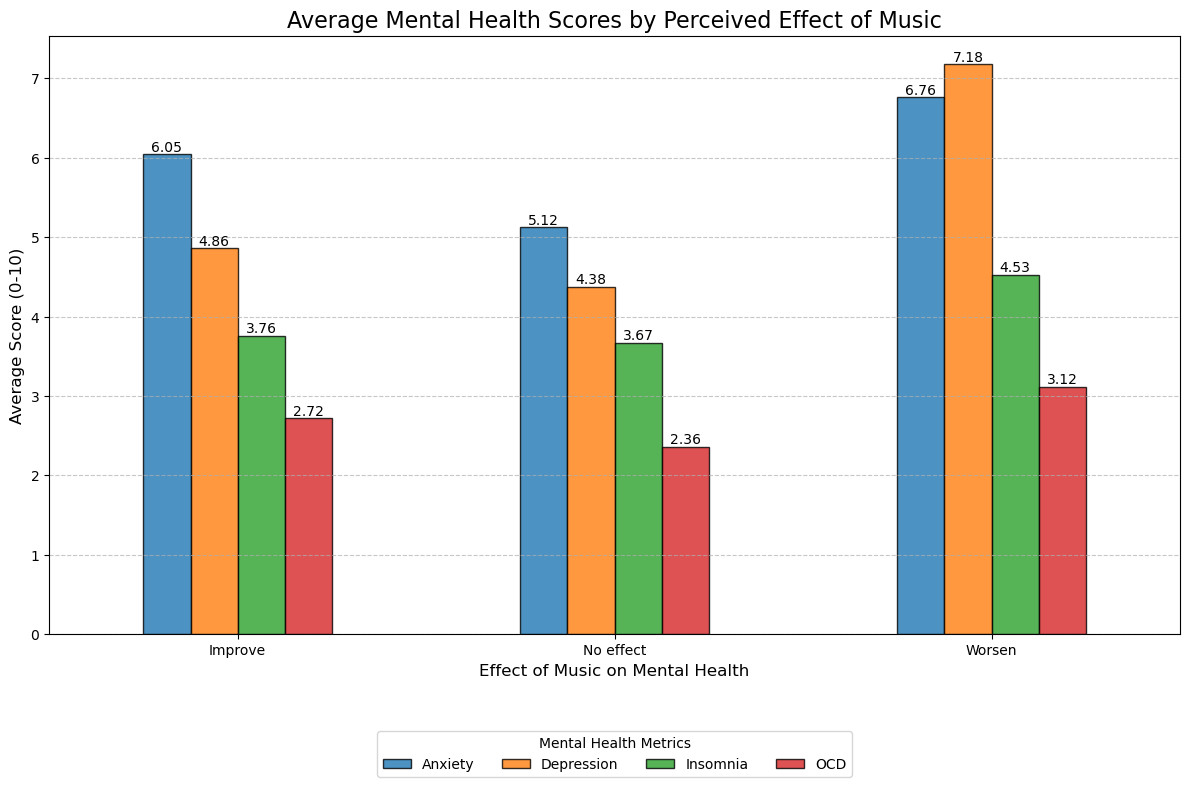

In [64]:
# Select relevant columns and drop rows with missing values
df_music_effects = df[['Music effects', 'Anxiety', 'Depression', 'Insomnia', 'OCD']].dropna()

# Grouping by 'Music effects' and computing average scores
music_effects_avg = df_music_effects.groupby('Music effects')[['Anxiety', 'Depression', 'Insomnia', 'OCD']].mean().reset_index()

# Plotting the bar chart
ax = music_effects_avg.set_index('Music effects').plot(
    kind='bar', figsize=(12, 8), alpha=0.8, edgecolor='black'
)
plt.title('Average Mental Health Scores by Perceived Effect of Music', fontsize=16)
plt.xlabel('Effect of Music on Mental Health', fontsize=12)
plt.ylabel('Average Score (0-10)', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Mental Health Metrics', fontsize=10, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotating the bars with values
for p in ax.patches:
    height = p.get_height()
    if not pd.isna(height):
        ax.annotate(
            f'{height:.2f}',
            (p.get_x() + p.get_width() / 2., height),
            ha='center', va='center',
            fontsize=10, color='black',
            xytext=(0, 5),
            textcoords='offset points'
        )

plt.tight_layout()
plt.show()


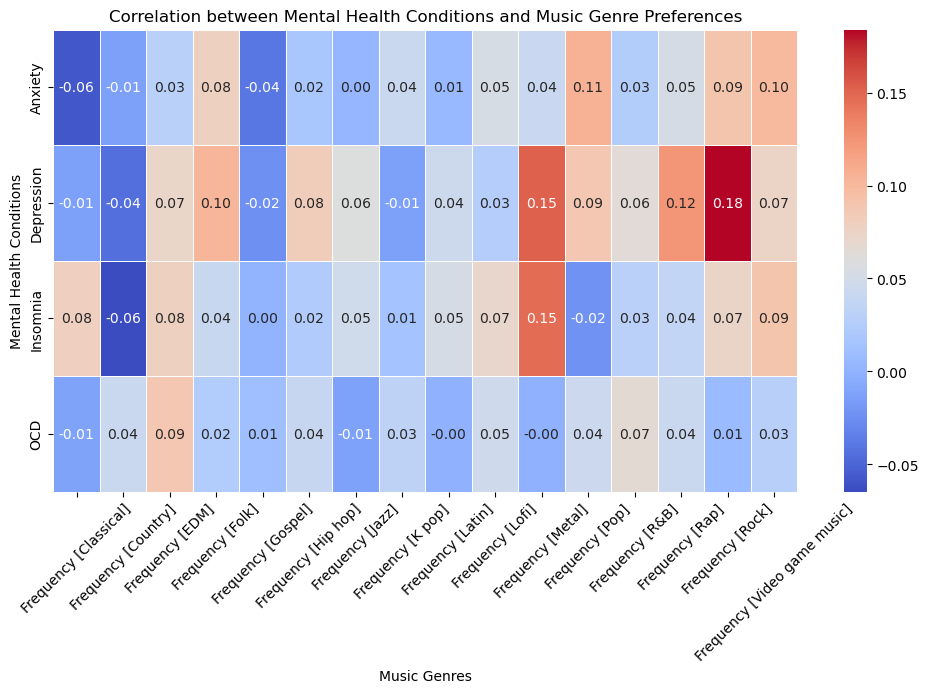

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute correlations between mental health conditions and genre frequency
mental_health_cols = ["Anxiety", "Depression", "Insomnia", "OCD"]
genre_cols = [col for col in df_cleaned.columns if "Frequency" in col]

# Calculate correlation matrix
correlation_matrix = df_cleaned[mental_health_cols + genre_cols].corr()

# Extract only correlations between mental health conditions and genres
correlation_subset = correlation_matrix.loc[mental_health_cols, genre_cols]

# Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_subset, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation between Mental Health Conditions and Music Genre Preferences")
plt.xlabel("Music Genres")
plt.ylabel("Mental Health Conditions")
plt.xticks(rotation=45)
plt.show()

### Data Cleaning

In [16]:
# Copying the dataset to avoid modifying the original
df_cleaned = df.copy()

# Step 1: Handling Missing Values

# Filling missing BPM values with median
df_cleaned["BPM"].fillna(df_cleaned["BPM"].median(), inplace=True)

# Filling categorical missing values with mode (most frequent value)
categorical_cols = ["While working", "Instrumentalist", "Composer", "Foreign languages"]
for col in categorical_cols:
    df_cleaned[col].fillna(df_cleaned[col].mode()[0], inplace=True)

# Dropping rows with missing critical data (Age & Streaming Service)
df_cleaned.dropna(subset=["Age", "Primary streaming service", "Music effects"], inplace=True)

df_cleaned

C:\Users\Ashok Kasaram\AppData\Local\Temp\ipykernel_12432\1979475845.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned["BPM"].fillna(df_cleaned["BPM"].median(), inplace=True)
C:\Users\Ashok Kasaram\AppData\Local\Temp\ipykernel_12432\1979475845.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
2,8/27/2022 21:28,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.
5,8/27/2022 21:56,18.0,Spotify,5.0,Yes,Yes,Yes,Jazz,Yes,Yes,...,Very frequently,Very frequently,Very frequently,Never,8.0,8.0,7.0,7.0,Improve,I understand.
6,8/27/2022 22:00,18.0,YouTube Music,3.0,Yes,Yes,No,Video game music,Yes,Yes,...,Rarely,Never,Never,Sometimes,4.0,8.0,6.0,0.0,Improve,I understand.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,10/30/2022 14:37,17.0,Spotify,2.0,Yes,Yes,No,Rock,Yes,Yes,...,Never,Rarely,Very frequently,Never,7.0,6.0,0.0,9.0,Improve,I understand.
732,11-01-2022 22:26,18.0,Spotify,1.0,Yes,Yes,No,Pop,Yes,Yes,...,Never,Never,Sometimes,Sometimes,3.0,2.0,2.0,5.0,Improve,I understand.
733,11-03-2022 23:24,19.0,Other streaming service,6.0,Yes,No,Yes,Rap,Yes,No,...,Sometimes,Sometimes,Rarely,Rarely,2.0,2.0,2.0,2.0,Improve,I understand.
734,11-04-2022 17:31,19.0,Spotify,5.0,Yes,Yes,No,Classical,No,No,...,Never,Never,Never,Sometimes,2.0,3.0,2.0,1.0,Improve,I understand.


In [17]:
import pandas as pd
from IPython.display import display

# Assuming df is your DataFrame
missing_summary = df_cleaned.isnull().sum()
missing_percentage = (missing_summary / len(df_cleaned)) * 100

# Combine and display the missing values summary
missing_data = pd.DataFrame({
    "Column": df_cleaned.columns,
    "Missing Values": missing_summary,
    "Percentage Missing": missing_percentage
}).sort_values(by="Percentage Missing", ascending=False)

# Displaying the missing data summary
display(missing_data)


,Column,Missing Values,Percentage Missing
Timestamp,Timestamp,0,0.0
Frequency [Jazz],Frequency [Jazz],0,0.0
Music effects,Music effects,0,0.0
OCD,OCD,0,0.0
Insomnia,Insomnia,0,0.0
Depression,Depression,0,0.0
Anxiety,Anxiety,0,0.0
Frequency [Video game music],Frequency [Video game music],0,0.0
Frequency [Rock],Frequency [Rock],0,0.0
Frequency [Rap],Frequency [Rap],0,0.0


### Feature Engineering

In [66]:
# Step 2: Encoding Categorical Data

# Mapping frequency values to numerical scores
frequency_mapping = {
    "Never": 0,
    "Rarely": 1,
    "Sometimes": 2,
    "Frequently": 3,
    "Very frequently": 4
}

# Apply encoding to frequency columns
frequency_cols = [col for col in df_cleaned.columns if "Frequency" in col]
for col in frequency_cols:
    df_cleaned[col] = df_cleaned[col].map(frequency_mapping)

# Encode Yes/No responses as 1/0
binary_cols = ["While working", "Instrumentalist", "Composer", "Exploratory", "Foreign languages"]
binary_mapping = {"Yes": 1, "No": 0}

for col in binary_cols:
    df_cleaned[col] = df_cleaned[col].map(binary_mapping)

# Step 3: Feature Engineering

# Create a new feature: Average Music Listening Time per Day
df_cleaned["Listening Intensity"] = df_cleaned["Hours per day"] * df_cleaned[frequency_cols].mean(axis=1)

# Aggregate genre preferences into categories (e.g., Relaxing vs. Energetic Music)
relaxing_genres = ["Frequency [Classical]", "Frequency [Jazz]", "Frequency [Lofi]", "Frequency [Folk]", "Frequency [R&B]"]
energetic_genres = ["Frequency [Hip hop]", "Frequency [Rap]", "Frequency [Rock]", "Frequency [EDM]", "Frequency [Metal]"]

df_cleaned["Relaxing Preference"] = df_cleaned[relaxing_genres].mean(axis=1)
df_cleaned["Energetic Preference"] = df_cleaned[energetic_genres].mean(axis=1)

# Create a feature for overall music engagement (total genre frequency score)
df_cleaned["Total Genre Engagement"] = df_cleaned[frequency_cols].sum(axis=1)

# Display the modified dataset with new features
df_cleaned


,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Anxiety,Depression,Insomnia,OCD,Music effects,Permissions,Listening Intensity,Relaxing Preference,Energetic Preference,Total Genre Engagement
2,8/27/2022 21:28,18.0,Spotify,4.0,0,0,0,Video game music,0,1,...,7.0,7.0,10.0,2.0,No effect,I understand.,5.25000,0.6,1.8,21
3,8/27/2022 21:40,61.0,YouTube Music,2.5,1,0,1,Jazz,1,1,...,9.0,7.0,3.0,3.0,Improve,I understand.,3.28125,2.2,0.0,21
4,8/27/2022 21:54,18.0,Spotify,4.0,1,0,0,R&B,1,0,...,7.0,2.0,5.0,9.0,Improve,I understand.,6.25000,1.2,1.8,25
5,8/27/2022 21:56,18.0,Spotify,5.0,1,1,1,Jazz,1,1,...,8.0,8.0,7.0,7.0,Improve,I understand.,10.93750,2.6,2.2,35
6,8/27/2022 22:00,18.0,YouTube Music,3.0,1,1,0,Video game music,1,1,...,4.0,8.0,6.0,0.0,Improve,I understand.,3.00000,1.6,0.6,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,10/30/2022 14:37,17.0,Spotify,2.0,1,1,0,Rock,1,1,...,7.0,6.0,0.0,9.0,Improve,I understand.,2.87500,1.6,1.6,23
732,11-01-2022 22:26,18.0,Spotify,1.0,1,1,0,Pop,1,1,...,3.0,2.0,2.0,5.0,Improve,I understand.,0.75000,0.6,0.4,12
733,11-03-2022 23:24,19.0,Other streaming service,6.0,1,0,1,Rap,1,0,...,2.0,2.0,2.0,2.0,Improve,I understand.,9.37500,1.4,2.0,25
734,11-04-2022 17:31,19.0,Spotify,5.0,1,1,0,Classical,0,0,...,2.0,3.0,2.0,1.0,Improve,I understand.,2.18750,1.0,0.0,7


### Training Machine learning Models

In [68]:
#1. Random Forest Models

# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.preprocessing import MultiLabelBinarizer
import pickle  # To save the model

# Step 1: Define Model Training Function
def train_music_recommendation_model(df_cleaned):
    """
    Trains a MultiOutput RandomForest Model to predict music genres based on mental health conditions.

    Args:
        df_cleaned (pd.DataFrame): Preprocessed dataset with features and genre labels.

    Returns:
        model (MultiOutputClassifier): Trained MultiOutput RandomForest model.
        mlb (MultiLabelBinarizer): Label binarizer for encoding multi-label targets.
    """
    # Define Features (X) and Target (Y)
    X = df_cleaned[["Anxiety", "Depression", "Insomnia", "OCD", "Listening Intensity", "Relaxing Preference", "Energetic Preference", "Total Genre Engagement"]]
    Y = df_cleaned[[col for col in df_cleaned.columns if "Frequency" in col]]  # Selecting genre preferences

    # Train-Test Split
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

    # Train MultiOutput RandomForest Classifier
    base_model = RandomForestClassifier(n_estimators=100, random_state=42)
    model = MultiOutputClassifier(base_model)
    model.fit(X_train, Y_train)

    # Evaluate Model
    Y_pred = model.predict(X_test)

    # Convert Targets into MultiLabel Format
    mlb = MultiLabelBinarizer()
    Y_test_binary = mlb.fit_transform(Y_test.values)
    Y_pred_binary = mlb.transform(Y_pred)

    # Compute Evaluation Metrics
    precision = precision_score(Y_test_binary, Y_pred_binary, average="micro", zero_division=1)
    recall = recall_score(Y_test_binary, Y_pred_binary, average="micro", zero_division=1)
    f1 = f1_score(Y_test_binary, Y_pred_binary, average="micro", zero_division=1)

    print(f"✅ Model Trained Successfully!")
    print(f"🎯 Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}")

    return model, mlb

# Step 2: Define Genre Prediction Function
def predict_genres(model, user_input):
    """
    Predicts music genres based on user input mental health conditions.

    Args:
        model (MultiOutputClassifier): Trained model.
        user_input (dict): Dictionary with Anxiety, Depression, Insomnia, and OCD scores.

    Returns:
        predicted_genres (list): List of recommended music genres.
    """
    input_df = pd.DataFrame([user_input])
    predicted_labels = model.predict(input_df)[0]

    # Map predictions to genre labels
    genre_labels = [col for col in df_cleaned.columns if "Frequency" in col]
    predicted_genres = [genre_labels[i] for i in range(len(predicted_labels)) if predicted_labels[i] >= 3]  # Only strong predictions

    return predicted_genres if predicted_genres else ["No strong genre preference detected."]

# Step 3: Save & Load Model Functions
def save_model(model, filename="music_recommendation_model.pkl"):
    """ Saves the trained model to a file. """
    with open(filename, "wb") as file:
        pickle.dump(model, file)
    print(f"📁 Model saved as {filename}")

def load_model(filename="music_recommendation_model.pkl"):
    """ Loads a saved model from a file. """
    with open(filename, "rb") as file:
        model = pickle.load(file)
    print(f"📁 Model loaded successfully!")
    return model

# Example Usage
# Train the model
trained_model, label_binarizer = train_music_recommendation_model(df_cleaned)

# Save the trained model
save_model(trained_model)

# Predict genres based on a sample input
sample_user = {"Anxiety": 6, "Depression": 4, "Insomnia": 7, "OCD": 3, 
               "Listening Intensity": 5, "Relaxing Preference": 2, "Energetic Preference": 3, "Total Genre Engagement": 25}

recommended_genres = predict_genres(trained_model, sample_user)
print(f"🎵 Recommended Genres: {recommended_genres}")


✅ Model Trained Successfully!
🎯 Precision: 0.9757, Recall: 0.9254, F1-Score: 0.9499
📁 Model saved as music_recommendation_model.pkl
🎵 Recommended Genres: ['Frequency [Hip hop]', 'Frequency [Metal]', 'Frequency [Rap]', 'Frequency [Rock]']


In [71]:
#2. Xgboost Model
import pandas as pd
import numpy as np
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MultiLabelBinarizer
from sklearn.metrics import precision_score, recall_score, f1_score
import xgboost as xgb
from sklearn.multioutput import MultiOutputClassifier

# Step 1: Prepare Data for XGBoost
def prepare_data(df_cleaned):
    X = df_cleaned[["Anxiety", "Depression", "Insomnia", "OCD", "Listening Intensity", "Relaxing Preference", "Energetic Preference", "Total Genre Engagement"]]
    Y = df_cleaned[[col for col in df_cleaned.columns if "Frequency" in col]]
    
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
    
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    mlb = MultiLabelBinarizer()
    Y_train = mlb.fit_transform(Y_train.apply(lambda x: [str(v) for v in x], axis=1))
    Y_test = mlb.transform(Y_test.apply(lambda x: [str(v) for v in x], axis=1))
    
    return X_train, X_test, Y_train, Y_test, scaler, mlb

# Step 2: Train XGBoost Multi-Output Classifier
def train_xgboost_model(df_cleaned):
    X_train, X_test, Y_train, Y_test, scaler, mlb = prepare_data(df_cleaned)
    
    # Define XGBoost Classifier with Multi-Output Wrapper
    base_xgb = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False, max_depth=6, learning_rate=0.1, n_estimators=100)
    model = MultiOutputClassifier(base_xgb)
    
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    
    precision = precision_score(Y_test, Y_pred, average="micro", zero_division=1)
    recall = recall_score(Y_test, Y_pred, average="micro", zero_division=1)
    f1 = f1_score(Y_test, Y_pred, average="micro", zero_division=1)
    
    print(f"✅ XGBoost Model Trained Successfully!")
    print(f"🎯 Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}")
    
    return model, scaler, mlb

# Step 3: Save the Model and Preprocessing Objects
def save_xgboost_model(model, scaler, mlb):
    pickle.dump(model, open("music_recommendation_xgb.pkl", "wb"))
    pickle.dump(scaler, open("scaler.pkl", "wb"))
    pickle.dump(mlb, open("mlb.pkl", "wb"))
    print("📁 XGBoost Model and Preprocessors Saved Successfully!")

# Train and Save the XGBoost Model
if __name__ == "__main__":
    print("🎵 Training the XGBoost Model for Music Recommendation 🎵")
    trained_xgb_model, trained_scaler, trained_mlb = train_xgboost_model(df_cleaned)
    save_xgboost_model(trained_xgb_model, trained_scaler, trained_mlb)

🎵 Training the XGBoost Model for Music Recommendation 🎵


C:\Users\Ashok Kasaram\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:55:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ XGBoost Model Trained Successfully!
🎯 Precision: 0.9738, Recall: 0.9911, F1-Score: 0.9824
📁 XGBoost Model and Preprocessors Saved Successfully!


In [72]:
#3. Neural Networks
import pandas as pd
import numpy as np
import requests
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MultiLabelBinarizer
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.regularizers import l2
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import precision_score, recall_score, f1_score, precision_recall_curve
import tensorflow.keras.backend as K

# Step 1: Prepare Data for Neural Network
def prepare_data(df_cleaned):
    X = df_cleaned[["Anxiety", "Depression", "Insomnia", "OCD", "Listening Intensity", "Relaxing Preference", "Energetic Preference", "Total Genre Engagement"]]
    Y = df_cleaned[[col for col in df_cleaned.columns if "Frequency" in col]]
    
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
    
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    mlb = MultiLabelBinarizer()
    Y_train = mlb.fit_transform(Y_train.apply(lambda x: [str(v) for v in x], axis=1))
    Y_test = mlb.transform(Y_test.apply(lambda x: [str(v) for v in x], axis=1))
    
    # Compute Class Weights for Handling Imbalance
    class_weights = compute_class_weight("balanced", classes=np.unique(Y_train.flatten()), y=Y_train.flatten())
    class_weights_dict = {i: class_weights[i] for i in range(len(class_weights))}
    
    return X_train, X_test, Y_train, Y_test, scaler, mlb, class_weights_dict

# Step 2: Define Optimal Threshold Function
def optimal_threshold(Y_true, Y_pred_prob):
    precisions, recalls, thresholds = precision_recall_curve(Y_true.ravel(), Y_pred_prob.ravel())
    f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-10)
    return thresholds[np.argmax(f1_scores)]  # Best threshold where F1-score is maximized

# Step 3: Build Improved Neural Network Model
def build_neural_network(input_dim, output_dim):
    model = Sequential([
        Input(shape=(input_dim,)),
        Dense(64, activation='tanh', kernel_regularizer=l2(0.01)),
        Dropout(0.5),
        Dense(32, activation='tanh', kernel_regularizer=l2(0.01)),
        Dropout(0.5),
        Dense(output_dim, activation='softmax')  # Ensures better distribution of genres
    ])
    optimizer = keras.optimizers.Adam(learning_rate=0.00005)  # Lower learning rate for stability
    loss_fn = tf.keras.losses.BinaryCrossentropy(from_logits=True)  # Penalizes over-predictions
    model.compile(optimizer=optimizer, loss=loss_fn, metrics=['accuracy'])
    return model

# Step 4: Train the Neural Network with Early Stopping & Threshold Adjustment
def train_neural_network(df_cleaned):
    X_train, X_test, Y_train, Y_test, scaler, mlb, class_weights = prepare_data(df_cleaned)
    model = build_neural_network(X_train.shape[1], Y_train.shape[1])
    
    early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    model.fit(X_train, Y_train, epochs=30, batch_size=8, validation_data=(X_test, Y_test), callbacks=[early_stopping], class_weight=class_weights, verbose=1)
    
    # Predict Probabilities & Apply Dynamic Threshold
    Y_pred_prob = model.predict(X_test)
    threshold = min(0.7, optimal_threshold(Y_test, Y_pred_prob))  # Adjusted threshold to balance precision/recall
    Y_pred = (Y_pred_prob > threshold).astype(int)
    
    precision = precision_score(Y_test, Y_pred, average="micro", zero_division=1)
    recall = recall_score(Y_test, Y_pred, average="micro", zero_division=1)
    f1 = f1_score(Y_test, Y_pred, average="micro", zero_division=1)
    
    print(f"✅ Further Improved Neural Network Trained Successfully!")
    print(f"🎯 Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}")
    
    return model, scaler, mlb

# Step 5: Save the Model and Preprocessing Objects
def save_neural_model(model, scaler, mlb):
    model.save("music_recommendation_nn.keras")
    pickle.dump(scaler, open("scaler.pkl", "wb"))
    pickle.dump(mlb, open("mlb.pkl", "wb"))
    print("📁 Further Improved Neural Network Model and Preprocessors Saved Successfully!")

# Train and Save the Further Improved Neural Network Model
if __name__ == "__main__":
    print("🎵 Training the Further Improved Neural Network for Music Recommendation 🎵")
    trained_model, trained_scaler, trained_mlb = train_neural_network(df_cleaned)
    save_neural_model(trained_model, trained_scaler, trained_mlb)

🎵 Training the Further Improved Neural Network for Music Recommendation 🎵
Epoch 1/30


C:\Users\Ashok Kasaram\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\nn.py:780: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


73/73 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.2414 - loss: 8.7235 - val_accuracy: 0.2945 - val_loss: 1.2896
Epoch 2/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2315 - loss: 8.9964 - val_accuracy: 0.3014 - val_loss: 1.2744
Epoch 3/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2222 - loss: 8.8154 - val_accuracy: 0.3082 - val_loss: 1.2590
Epoch 4/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2357 - loss: 8.7420 - val_accuracy: 0.3151 - val_loss: 1.2450
Epoch 5/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2112 - loss: 8.5248 - val_accuracy: 0.3151 - val_loss: 1.2310
Epoch 6/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2332 - loss: 8.6152 - val_accuracy: 0.3219 - val_loss: 1.2178
Epoch 7/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2446 - loss: 8.2705 - val_accuracy: 0.3493 - val_loss: 1.2047
Epoch 8/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2668 - loss: 8.1755 - val_accuracy: 0.3493 - val_loss: 1.1915
Epo

### Building Recommendation System¶

In [74]:
!pip install flask flask-ngrok requests xgboost scikit-learn

In [75]:
!pip install Flask-Session

In [ ]:
import pickle
import requests
import xgboost as xgb
import pandas as pd
from flask import Flask, render_template_string, request, session, redirect, url_for
from flask_ngrok import run_with_ngrok
from flask_session import Session
from sklearn.preprocessing import StandardScaler

app = Flask(__name__)
run_with_ngrok(app)  # Runs Flask with ngrok for Jupyter Notebook

# Step 1: Setup Session for User Preferences
app.secret_key = "music_therapy_secret"
app.config["SESSION_TYPE"] = "filesystem"
Session(app)

# Step 2: Load Trained XGBoost Model and Scaler
def load_trained_xgb_model():
    with open("music_recommendation_xgb.pkl", "rb") as file:
        model = pickle.load(file)
    with open("scaler.pkl", "rb") as file:
        scaler = pickle.load(file)
    return model, scaler

# Step 3: Optimized Genre Mapping Based on Mental Health
condition_to_genre = {
    "Anxiety": ["Classical", "Jazz", "R&B", "Lo-fi", "Ambient"],
    "Depression": ["Classical", "Lo-fi", "Gospel", "Indie", "Soft Rock"],
    "Insomnia": ["Lo-fi", "Ambient", "Classical", "Soft Rock", "Acoustic"],
    "OCD": ["Pop", "Video Game Music", "EDM", "Instrumental", "Chillstep"],
    "Stress": ["Jazz", "Instrumental", "Acoustic", "Nature Sounds", "Chillstep"],
    "Energy Boost": ["Hip-hop", "EDM", "Rock", "Latin", "Funk"],
    "Focus & Productivity": ["Video Game Music", "Instrumental", "Lo-fi", "Classical", "Chillstep"],
    "Mood Uplift": ["Pop", "Indie", "R&B", "Latin", "Folk"]
}

# Step 4: Authenticate with Spotify API
def get_spotify_token():
    client_id = "e101fd80054e4a7c87fa96713131f32f"
    client_secret = "579afd3f20714bef92cc2a3ebc16a4fe"
    url = "https://accounts.spotify.com/api/token"
    headers = {"Content-Type": "application/x-www-form-urlencoded"}
    data = {"grant_type": "client_credentials", "client_id": client_id, "client_secret": client_secret}

    response = requests.post(url, headers=headers, data=data)
    return response.json().get("access_token")

# Step 5: Fetch Songs & Ensure Songs Are Displayed
def fetch_songs_from_spotify(genre, token, limit=10):  
    url = "https://api.spotify.com/v1/search"
    headers = {"Authorization": f"Bearer {token}"}
    params = {"q": genre, "type": "track", "limit": limit}

    response = requests.get(url, headers=headers, params=params)
    data = response.json()

    tracks = data.get("tracks", {}).get("items", [])
    song_list = []

    for track in tracks:
        song_info = {
            "Genre": genre,
            "Track": track["name"],
            "Artist": track["artists"][0]["name"],
            "Spotify URL": track["external_urls"]["spotify"],
            "Popularity": track["popularity"]
        }
        song_list.append(song_info)

    return sorted(song_list, key=lambda x: -x["Popularity"])  # Sort by popularity

# Step 6: Flask Routes (Ensuring Songs Show Up)
@app.route("/", methods=["GET", "POST"])
def index():
    genre_songs = {}
    selected_condition = ""

    # Load user's Dark Mode preference from session
    dark_mode = session.get("dark_mode", False)

    if request.method == "POST":
        # Handle Dark Mode Toggle
        if "toggle_dark_mode" in request.form:
            session["dark_mode"] = not session.get("dark_mode", False)
            return redirect(url_for("index"))

        selected_condition = request.form.get("condition")
        suggested_genres = condition_to_genre.get(selected_condition, [])

        user_choice = request.form.get("confirm_genres")
        if user_choice == "yes":
            genres = suggested_genres
        else:
            user_selected_genres = request.form.get("custom_genres").split(",")
            genres = [genre.strip() for genre in user_selected_genres if genre.strip()]

        token = get_spotify_token()
        for genre in genres:
            songs = fetch_songs_from_spotify(genre, token)
            if songs:  # Ensure songs exist before displaying
                genre_songs[genre] = songs

    return render_template_string("""
        <!DOCTYPE html>
        <html lang="en">
        <head>
            <meta charset="UTF-8">
            <meta name="viewport" content="width=device-width, initial-scale=1.0">
            <title>Music Therapy Recommendation</title>
            <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/bootstrap@5.3.0/dist/css/bootstrap.min.css">
            <style>
                body { 
                    background-color: {% if dark_mode %}black{% else %}white{% endif %}; 
                    color: {% if dark_mode %}white{% else %}black{% endif %}; 
                    text-align: center; padding: 20px; 
                    transition: background-color 0.5s, color 0.5s;
                }
                .container { 
                    background: {% if dark_mode %}#282828{% else %}#f8f9fa{% endif %}; 
                    padding: 20px; border-radius: 10px; 
                    box-shadow: 0px 0px 10px gray; max-width: 600px; margin: auto; 
                    transition: background 0.5s;
                }
                .btn-primary { background-color: #1db954; border: none; }
                .btn-primary:hover { background-color: #17a74c; }
                .btn-toggle { background-color: #ffcc00; border: none; color: black; }
                .btn-toggle:hover { background-color: #ffdd44; }
                .song-list { text-align: left; }
            </style>
        </head>
        <body>
            <div class="container">
                <form method="POST">
                    <button type="submit" name="toggle_dark_mode" class="btn btn-toggle">🌗 Toggle Dark Mode</button>
                </form>
                <h1 class="mb-4">🎵 Music Therapy Recommendation</h1>
                <form method="POST">
                    <label class="form-label">Select your mental health condition:</label>
                    <select name="condition" class="form-select mb-3" required>
                        {% for cond in condition_to_genre.keys() %}
                            <option value="{{ cond }}" {% if selected_condition == cond %}selected{% endif %}>{{ cond }}</option>
                        {% endfor %}
                    </select>
                    
                    <label class="form-label">Do you want recommendations from suggested genres?</label>
                    <div class="mb-3">
                        <input type="radio" name="confirm_genres" value="yes" required> Yes
                        <input type="radio" name="confirm_genres" value="no" required> No
                    </div>

                    <label class="form-label">If No, enter your preferred genres (comma-separated):</label>
                    <input type="text" name="custom_genres" class="form-control mb-3" placeholder="E.g. Pop, Jazz, Hip-Hop">

                    <button type="submit" class="btn btn-primary">Get Music Recommendations</button>
                </form>
                
                {% if genre_songs %}
                    <hr>
                    <h2 class="mt-4">🎧 Recommended Songs by Genre</h2>
                    {% for genre, songs in genre_songs.items() %}
                        <h3 class="mt-3">{{ genre }}</h3>
                        <ul class="list-group song-list">
                            {% for song in songs %}
                                <li class="list-group-item">
                                    <strong>{{ song["Track"] }}</strong> by {{ song["Artist"] }} - 
                                    <a href="{{ song['Spotify URL'] }}" target="_blank">🎶 Listen</a>
                                </li>
                            {% endfor %}
                        </ul>
                    {% endfor %}
                {% endif %}
            </div>
        </body>
        </html>
    """, condition_to_genre=condition_to_genre, selected_condition=selected_condition, genre_songs=genre_songs, dark_mode=dark_mode)
if __name__ == "__main__":
    app.run()

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
Exception in thread Thread-39:
Traceback (most recent call last):
  File "C:\Users\Ashok Kasaram\anaconda3\Lib\site-packages\urllib3\connection.py", line 199, in _new_conn
    sock = connection.create_connection(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Ashok Kasaram\anaconda3\Lib\site-packages\urllib3\util\connection.py", line 85, in create_connection
    raise err
  File "C:\Users\Ashok Kasaram\anaconda3\Lib\site-packages\urllib3\util\connection.py", line 73, in create_connection
    sock.connect(sa)
ConnectionRefusedError: [WinError 10061] No connection could be made because the target machine actively refused it

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "C:\Users\Ashok Kasaram\anaconda3\Lib\site-packages\urllib3\connectionpool.py", line 789, in urlopen
    response = self._make_request(
               ^^^^^^^^^^^^^^^^^^^
  File "C:\Users\A

In [ ]:
# Recommendation System Interface

with open('uploaded_image.jpg', 'wb') as f:
    f.write(uploaded_image['content'])
